In [22]:
import pandas as pd
df = pd.read_csv('C:\\Users\\sable\\Downloads\\mall-customers-data.csv')
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

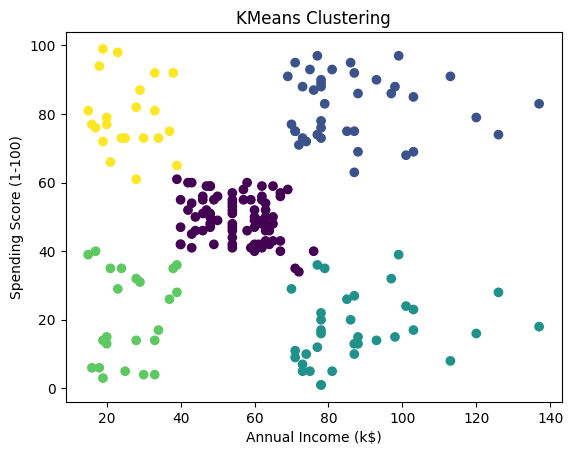

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and you want to cluster based on 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['annual_income', 'spending_score']]

# Scale the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method (optional)
# inertia = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, random_state=0)
#     kmeans.fit(X_scaled)
#     inertia.append(kmeans.inertia_)
# plt.plot(range(1, 11), inertia, marker='o')
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

# Based on the elbow method or prior knowledge, choose the number of clusters
n_clusters = 5  # Example: 5 clusters

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Visualize the clusters
plt.scatter(X['annual_income'], X['spending_score'], c=labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans Clustering')
plt.show()

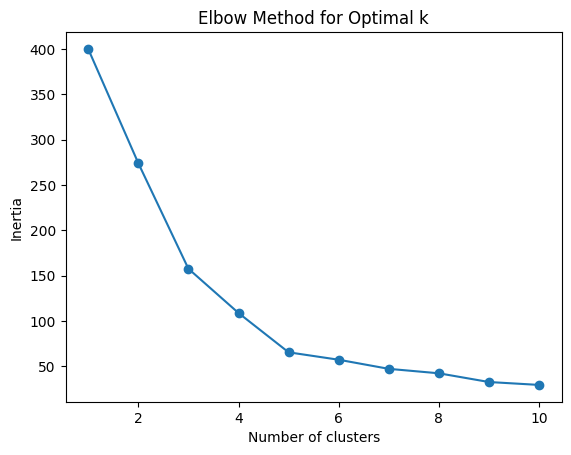

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Assuming df1 is your DataFrame and you want to cluster based on 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['annual_income', 'spending_score']]

# Scale the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [24]:
# prompt: apply DBSCAN on above dataset

import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is already defined and contains the data

# Select relevant features for clustering (e.g., Annual Income and Spending Score)
X = df[['annual_income', 'spending_score']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3) # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

# Print the first few rows to see the cluster assignments
print(df.head())

   customer_id  gender  age  annual_income  spending_score  Cluster
0            1    Male   19             15              39        0
1            2    Male   21             15              81        0
2            3  Female   20             16               6        0
3            4  Female   23             16              77        0
4            5  Female   31             17              40        0


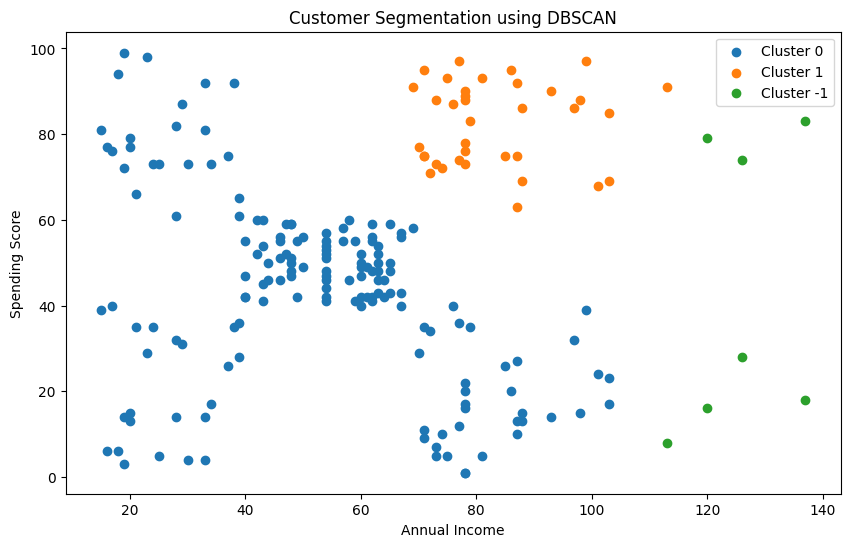

In [26]:
# prompt: generate visuvalizations on it

import matplotlib.pyplot as plt

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['annual_income'], cluster_data['spending_score'], label=f'Cluster {cluster}')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation using DBSCAN')
plt.legend()
plt.show()